## RMSD 

In [92]:
from numpy import genfromtxt
RMSD_openmm = genfromtxt('results/RMSD_openmm.csv', delimiter=',')
RMSD_pele = genfromtxt('results/RMSD_pele.csv', delimiter=',')

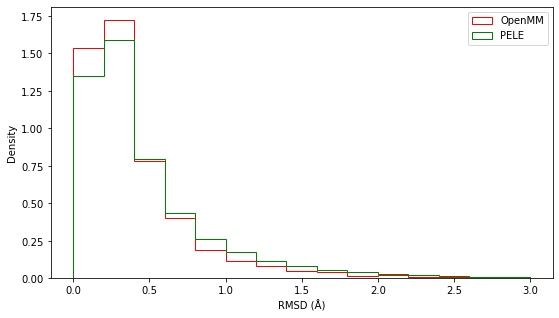

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram 
plt.figure(figsize=(9, 5))
plt.hist(RMSD_openmm , bins = 15, density = True, histtype = 'step', color = 'red', range = (0,3), label = 'OpenMM')
plt.hist(RMSD_pele , bins = 15, density = True, histtype = 'step', color = 'green', range = (0,3), label = 'PELE')
plt.xlabel('RMSD (Å)')
plt.ylabel('Density')
plt.legend(loc="upper right")
plt.savefig('results/RMSD.png')
plt.show()

## TFD

In [94]:
from numpy import genfromtxt
TFD_openmm = genfromtxt('results/TFD_openmm.csv', delimiter=',')
TFD_pele = genfromtxt('results/TFD_pele.csv', delimiter=',')

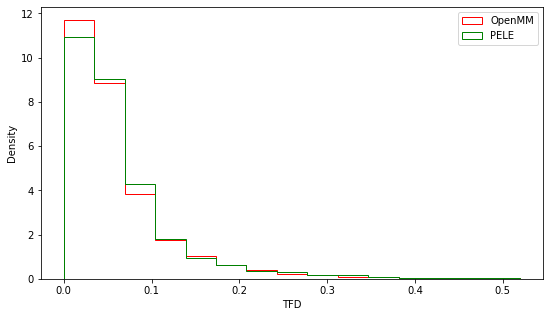

In [95]:
# Plot histogram 
plt.figure(figsize=(9, 5))
plt.hist(TFD_openmm , bins = 15, density = True, histtype = 'step', color = 'red', range = (0,0.52), label = 'OpenMM')
plt.hist(TFD_pele , bins = 15, density = True, histtype = 'step', color = 'green', range = (0,0.52), label = 'PELE')
plt.xlabel('TFD')
plt.ylabel('Density')
plt.legend(loc="upper right")
plt.savefig('results/RMSD.png')
plt.show()

## ddE

In [96]:
from numpy import genfromtxt
ddE_openmm = genfromtxt('results/ddE_openmm.csv', delimiter=',')
ddE_pele = genfromtxt('results/ddE_pele.csv', delimiter=',')

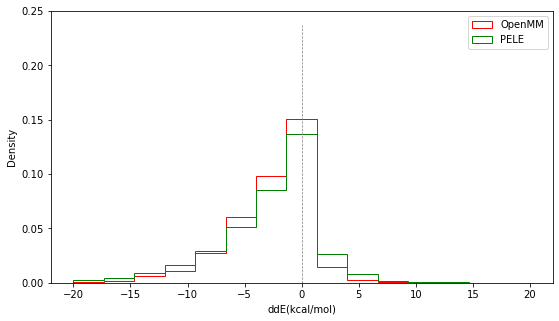

In [97]:
# Plot histogram 
plt.figure(figsize=(9, 5))
plt.hist(-ddE_openmm , bins = 15, density = True, histtype = 'step', color = 'red', range = (-20,20), label = 'OpenMM')
plt.hist(-ddE_pele , bins = 15, density = True, histtype = 'step', color = 'green', range = (-20,20), label = 'PELE')
plt.axvline(x=0, ymax= 0.95,  ls = '--', lw = 0.7, markeredgewidth= 0.9,  color = 'gray')
plt.xlabel('ddE(kcal/mol)')
plt.ylabel('Density')
plt.ylim((0,0.25))
plt.legend(loc="upper right")
plt.savefig('results/RMSD.png')
plt.show()

## ddE vs. TFD

Scatter plots of relative conformer energies versus TFD scores

In [98]:
from numpy import genfromtxt
ddE_openmm_st = genfromtxt('results/ddE3_openmm.csv', delimiter=',')
TFD_openmm_st = genfromtxt('results/TFD3_openmm.csv', delimiter=',')

In [99]:
from numpy import genfromtxt
ddE_pele_st = genfromtxt('results/ddE3_pele.csv', delimiter=',')
TFD_pele_st = genfromtxt('results/TFD3_pele.csv', delimiter=',')

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, title, ax = None, sort = True, bins = 40, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    fig.set_size_inches(8, 5)
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s = 2,  **kwargs )
    ax.set_xlabel('TFD', fontsize = 12)
    ax.set_ylabel('ddE(kcal/mol)', fontsize = 12)
    ax.set_title(title,fontsize = 14)
    ax.set_yscale('symlog')
    ax.set_xlim([None,0.8])
    

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_title('Density', fontsize = 10)


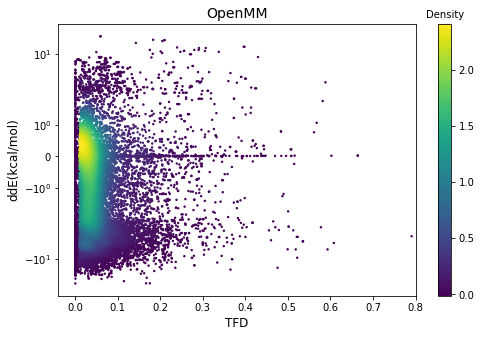

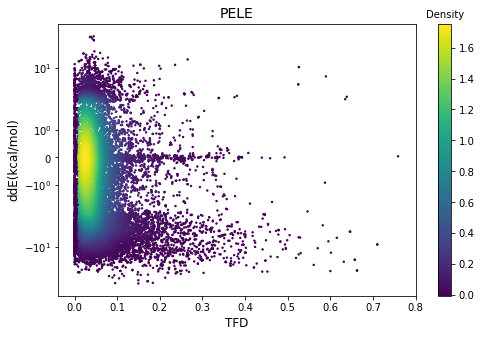

In [101]:
density_scatter(TFD_openmm_st,-ddE_openmm_st, 'OpenMM')
density_scatter(TFD_pele_st,-ddE_pele_st, 'PELE')